## SEIS 764-01 Assignment 4
**Jamie Boehme**

Import libraries for processing.

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

Read in data from Github repo

In [2]:
url = 'https://raw.githubusercontent.com/jamieboehme/Artificial-Intelligence/main/CellDNA.csv'
df = pd.read_csv(url, header=None)

Do some quick exploration of the dataset

In [3]:
df.columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','Target']
df.shape

(1217, 14)

Transform target variable into those that are interesting (have values greater than 0) and those that are not interesting.

In [4]:
new_target = df.loc[:,'Target']
new_target = pd.DataFrame(new_target)
new_target.loc[new_target.Target > 0, 'Target'] = 1

In [5]:
new_target

,Target
0,0
1,0
2,0
3,0
4,1
...,...
1212,0
1213,1
1214,0
1215,0


In [6]:
y = new_target.values.ravel()

In [7]:
x = df.iloc[:,0:13]

Standardize training variables

In [8]:
ZX= preprocessing.scale(x)
x = pd.DataFrame(ZX)
print(x, '\n')
print(x.mean(axis=0), 
x.std(axis=0))

            0         1         2         3         4         5         6   \
0     0.159528 -1.802006 -1.208134  0.114420 -0.135689  0.538311 -1.587426   
1    -0.939212 -1.809877  0.424363 -0.933511 -0.817247  0.019258  1.500586   
2     0.410247 -1.673790  0.555385  0.200447  0.134019  0.501621  1.684134   
3    -0.548385 -1.617137  1.879947 -1.059096  0.939523 -6.206504  1.253012   
4     0.181650 -1.525316  2.335905  0.578476 -0.417798  0.681969 -1.048779   
...        ...       ...       ...       ...       ...       ...       ...   
1212  0.115283  1.480684  0.036132  0.252878  0.049329  0.537678  0.250896   
1213  0.941181  1.528803 -1.156399  1.554010 -0.075675  0.729753  1.142193   
1214 -0.762234  1.588181 -0.028590 -0.555628 -0.315562  0.213238 -0.491114   
1215  0.166902  1.629782  0.170750  1.050082 -0.201979  0.705453  1.445251   
1216 -0.835975  1.603325  0.383793 -1.040983 -0.235315 -1.213681  0.364560   

            7         8         9         10        11        1

1. Train a neural network using **ALL** the records in the dataset to perform a 
two-class classification.

In [9]:
model_1 = Sequential()
model_1.add(Dense(units = 11, input_dim=13, activation = 'relu', name = 'h1'))
model_1.add(Dense(units = 7, activation = 'relu', name = 'h2'))
model_1.add(Dense(units = 4, activation = 'relu', name = 'h3'))
model_1.add(Dense(units = 2, activation = 'softmax')) 

In [10]:
y_cat = utils.to_categorical(y,2)

In [11]:
model_1.compile(loss='binary_crossentropy', optimizer ='Adam', metrics=['accuracy']) 
model_1.fit(x, y_cat, epochs=50, validation_split=.33, batch_size=4, verbose=1) 

Epoch 1/50
204/204 [==============================] - 2s 7ms/step - loss: 0.6491 - accuracy: 0.7816 - val_loss: 0.5573 - val_accuracy: 0.8483
Epoch 2/50
204/204 [==============================] - 1s 5ms/step - loss: 0.3802 - accuracy: 0.8294 - val_loss: 0.3181 - val_accuracy: 0.8483
Epoch 3/50
204/204 [==============================] - 1s 6ms/step - loss: 0.2666 - accuracy: 0.8294 - val_loss: 0.2828 - val_accuracy: 0.8483
Epoch 4/50
204/204 [==============================] - 1s 6ms/step - loss: 0.2414 - accuracy: 0.8294 - val_loss: 0.2714 - val_accuracy: 0.8483
Epoch 5/50
204/204 [==============================] - 1s 5ms/step - loss: 0.2245 - accuracy: 0.8294 - val_loss: 0.2601 - val_accuracy: 0.8483
Epoch 6/50
204/204 [==============================] - 1s 5ms/step - loss: 0.2105 - accuracy: 0.8294 - val_loss: 0.2554 - val_accuracy: 0.8483
Epoch 7/50
204/204 [==============================] - 1s 6ms/step - loss: 0.2008 - accuracy: 0.8883 - val_loss: 0.2554 - val_accuracy: 0.8607
Epoch 

Print architectural layers of model

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 11)                154       
                                                                 
 h2 (Dense)                  (None, 7)                 84        
                                                                 
 h3 (Dense)                  (None, 4)                 32        
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


Obtain overall accuracy score

In [13]:
accuracy_score = model_1.evaluate(x, y_cat)

39/39 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9326


Print classification report on training data

In [14]:
y_pred_prob = model_1.predict(x)
y_pred_class = np.argmax(y_pred_prob, axis = 1) # put some logic on max numpy function argmax
y_pred_class = utils.to_categorical(y_pred_class,2)
print(classification_report(y_cat,y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1017
           1       0.74      0.92      0.82       200

   micro avg       0.93      0.93      0.93      1217
   macro avg       0.86      0.93      0.89      1217
weighted avg       0.94      0.93      0.94      1217
 samples avg       0.93      0.93      0.93      1217



2. Extract the hidden representations (Z-Code) of **ALL** the records from the last 
layer (the layer right before the Softmax layer) of the trained neural network.

In [15]:
model_2 = Model(inputs=model_1.input,
                outputs = model_1.get_layer('h3').output)
Z_code = model_2.predict(x)

3. If the dimension of the Z-Code is greater than two dimensions, perform a t-sne 
compression to reduce the dimension to 2. 

In [16]:
tsne = TSNE(n_components=2, random_state=0)  
tsne_z = tsne.fit_transform(Z_code)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


4. Use t-sne compression results to reduce the dimensionality of the raw data from 
13 to 2. (Note: raw data = X that has been standardized = X that you input to your 
NN.) 

In [17]:
tsne_x = tsne.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


5. Create two group plots: the one on the left contains points you obtained in step 4, 
and the one on the right contains points you obtained in step 3. Please make sure 
that you use two colors to represent the classes of the data points in each plot. 
Please see our slides for the example plots. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'tsne x')]

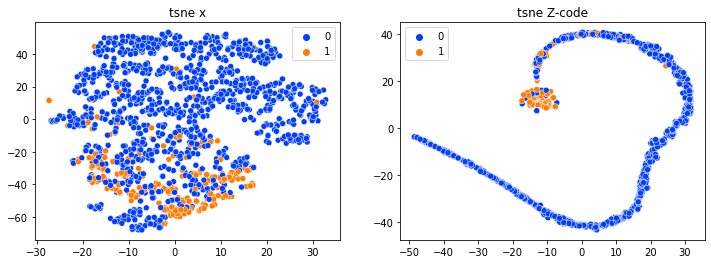

In [18]:
x1,y1=tsne_z[:,0],tsne_z[:,1] 
x2,y2=tsne_x[:,0],tsne_x[:,1]
f, axes = plt.subplots(1, 2, figsize=(12,4))
palette = sns.color_palette("bright", 2) 
sns.scatterplot(x1, y1, palette=palette, hue = y, legend='full',ax=axes[1]).set(title = 'tsne Z-code') 
sns.scatterplot(x2, y2, palette=palette, hue = y, legend='full',ax=axes[0]).set(title = 'tsne x')